In [1]:
import numpy as np
import pandas 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
import seaborn as sns
from pandas import DataFrame, Series

%matplotlib inline

In [2]:
df = pandas.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


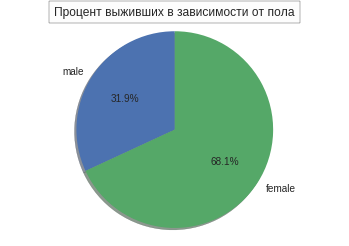

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pylab import *
su = df.query('Survived == 1')
sex = su.groupby(['Sex']).sum()
female = round(float(sex.iloc[0,0]/len(su))*100, 1)#fem
male = round(float(sex.iloc[1,0]/len(su))*100, 1)#male
labels = 'male', 'female'
sizes = [male, female]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
title('Процент выживших в зависимости от пола', bbox={'facecolor':'3', 'pad':5})
plt.show()

На круговой диаграмме видно, что больше половины выжиdших -- женщины.

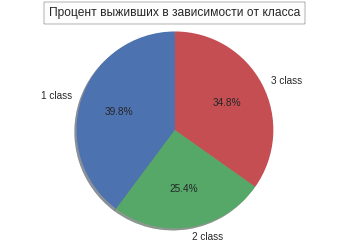

In [4]:
cl = su.groupby(['Pclass']).sum()
class1 = round(float(cl.iloc[0,0]/len(su))*100, 1)
class2 = round(float(cl.iloc[1,0]/len(su))*100, 1)
class3 = round(float(cl.iloc[2,0]/len(su))*100, 1)
labels = '1 class', '2 class', '3 class'
sizes = [class1, class2, class3]
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
title('Процент выживших в зависимости от класса', bbox={'facecolor':'3', 'pad':5})
plt.show()

Среди выживших больше всего пассажиров из 1 класса, чуть меньше из 3, а у пассажиров 2 класса шансы выбраться живыми с корабля были наименьшими.

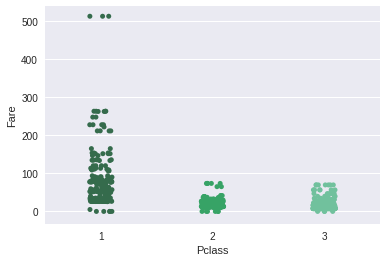

In [5]:
sns.stripplot(x='Pclass', y='Fare', data=df,  jitter=True, palette='BuGn_d')

По графикам видно, что самый большой разброс в цене на билеты наблюдался в 1 классе, 
самые дорогие билеты стоят больше 500 долларов. 
во 2 и 3 классах таких различий не наблюдалось, разница в стоимости билетов внутри этих классов была не слишком 
существенной

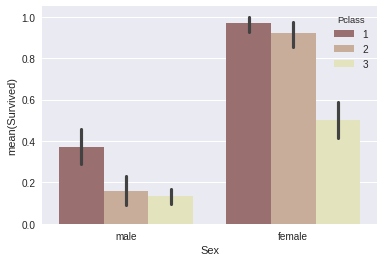

In [6]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='pink')

самая большая вероятность выжить -- у женщины из 1 класса. самая низкая (ожидаемо) -- у мужчины из 3 класса.
интересно, что разница в вероятности выжить у женщин 1 и 2 класса небольшая (а сама вероятность больше 90%),
у мужчин  1 и 2 классов разница наоборот довольно существенная (около 20%). 
мужчины из 3 класса выживают примерно с такой же долей вероятности, как и мужчины из 2 класса, а вот женщины из 
3 класса заметно отстают от женщин из классов выше (примерно на 40%)
A -- вероятность выжить, F1 -- женщина 1 класса, F2 -- женщина 2 класса, F3 -- женщина 3 класса
M1 -- мужчина 3 класса
P(A|F1)>P(A|M3), P(A|F3)<P(A|F2)

In [7]:
df['Sex'] = df['Sex'].map({'female': 0, 'male':1}).astype(int)

замена NaN медианами 

In [8]:
df = df.fillna(df.median()) 

добавляем столбец с родственниками, т.к. их могут посадить в 1 шлюпку

In [9]:
x_labels = ['Pclass', 'Fare', 'Age', 'Sex', 'SibSp']
X, y = df[x_labels], df['Survived']
X.head()

,Pclass,Fare,Age,Sex,SibSp
PassengerId,,,,,
1,3,7.2500,22.0,1,1
2,1,71.2833,38.0,0,1
3,3,7.9250,26.0,0,0
4,1,53.1000,35.0,0,1
5,3,8.0500,35.0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

(623, 5) (268, 5) (623,) (268,)


,Pclass,Fare,Age,Sex,SibSp
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2.227612,35.056342,30.148619,0.641791,0.458955
std,0.863569,54.258322,13.229248,0.480371,0.840342
min,1.000000,0.000000,0.830000,0.000000,0.000000
25%,1.000000,7.925000,22.000000,0.000000,0.000000
50%,3.000000,13.645850,28.000000,1.000000,0.000000
75%,3.000000,34.444800,36.000000,1.000000,1.000000
max,3.000000,512.329200,74.000000,1.000000,5.000000


In [11]:
#Decision Tree
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=5)
clf.fit(np.array(X_train), np.array(y_train)) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

сначала я ставила показатель минимального кол-ва веток на 5, потом
на числах до 20, и оценка эффективности росла. на 20 и 21 она остаётся максимальной, потом начинает снижаться. поэтому 
я выбрала 20. с листьями и макс.глубиной то же самое.

In [12]:
importances = pandas.Series(clf.feature_importances_, index=x_labels)
print(importances)

Pclass    0.132041
Fare      0.175109
Age       0.130629
Sex       0.532261
SibSp     0.029960
dtype: float64


In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.89      0.83       156
          1       0.81      0.66      0.73       112

avg / total       0.80      0.79      0.79       268



In [15]:
print(np.mean(cross_val_score(clf, X_train, y_train, cv=5))) 

0.796090322581


In [16]:
model = RandomForestClassifier(n_estimators = 100)

In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       156
          1       0.78      0.70      0.74       112

avg / total       0.79      0.79      0.79       268



In [18]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

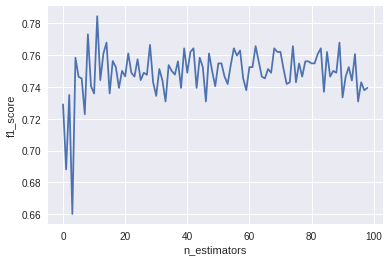

In [19]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.show()

In [20]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(precision_score(y_test, y_pred))

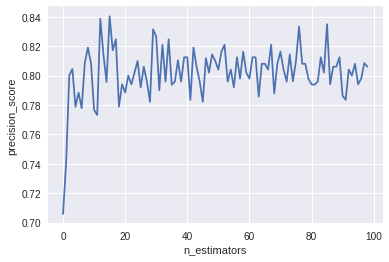

In [21]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('precision_score')
plt.show()

In [22]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(recall_score(y_test, y_pred))

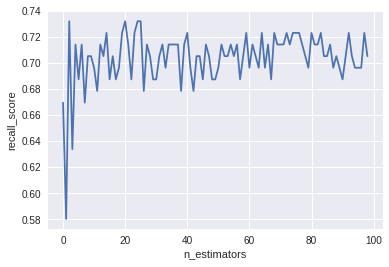

In [23]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('recall_score')
plt.show()

графики ф-меры, точности и полноты говорят о том, что нужно задействовать от 20 деревьев (и до 80-100)